In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import collections
#avaliacao dos resultados da previsao
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn import metrics


# Other Libraries
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [57]:
df = pd.read_csv('/home/thiago/Downloads/creditcard.csv')
df.head()
df["Amount"].mean()

88.34961925087359

existem 0 dados faltando.
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


Text(0.5,1,'Class Distributions \n (0: Sem Fraude || 1: Fraude)')

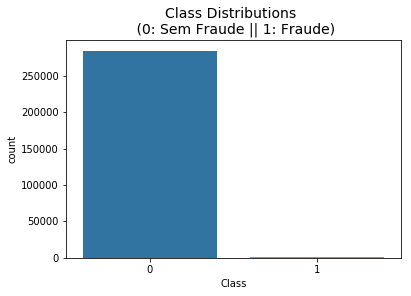

In [3]:
#verificar se ha valores faltando
print('existem {} dados faltando.'.format(df.isnull().sum().max()))

#verificar quais sao as colunas
print(df.columns)

#verificar distribuicao das classes
sns.countplot('Class', data=df)
plt.title('Class Distributions \n (0: Sem Fraude || 1: Fraude)', fontsize=14)

In [4]:
from sklearn.preprocessing import StandardScaler, RobustScaler

#scaling das variaveis tempo e renda, que serao substituidas por seus novos valores no dataframe
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

df.head()



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


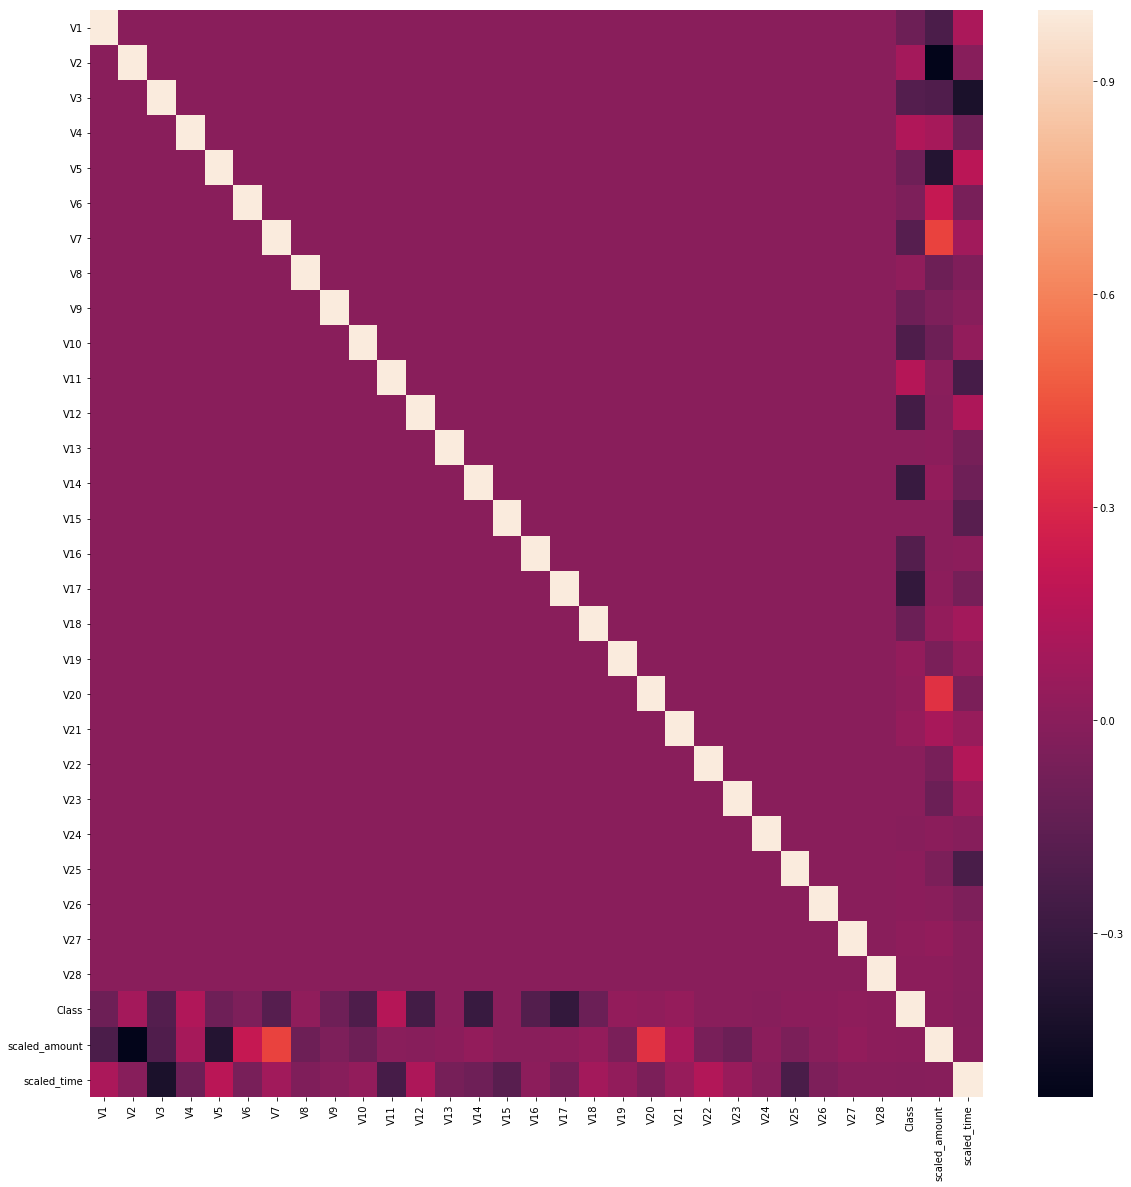

In [5]:
#heatmap de correlacoes
corr = df.corr()
 
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        ax = ax)



['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'scaled_amount', 'scaled_time']


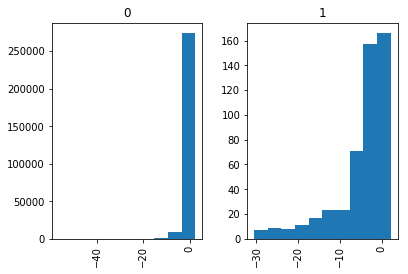

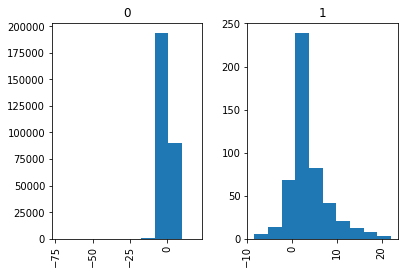

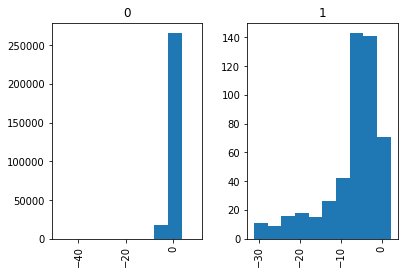

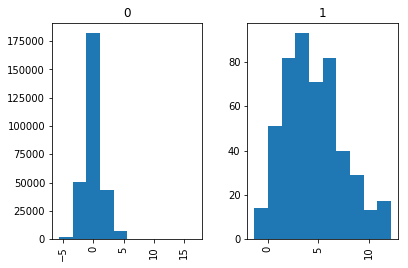

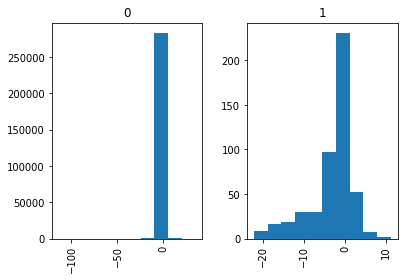

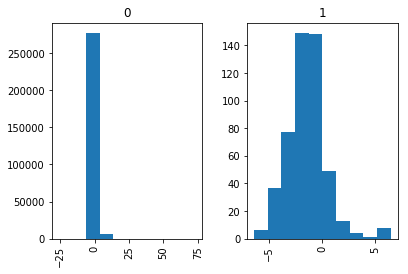

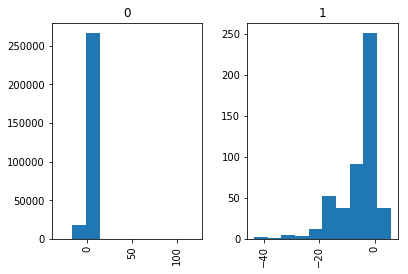

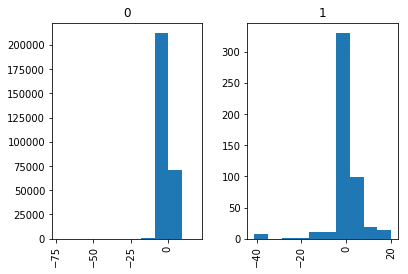

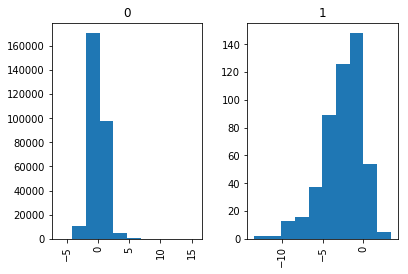

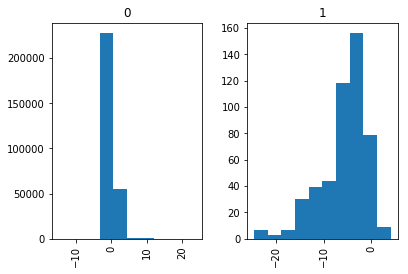

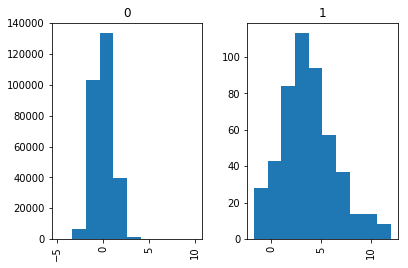

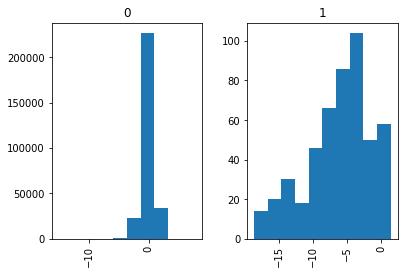

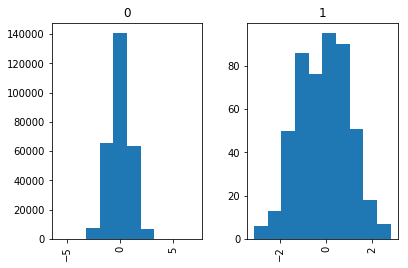

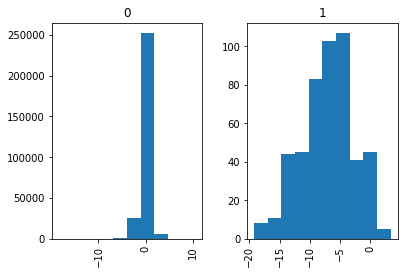

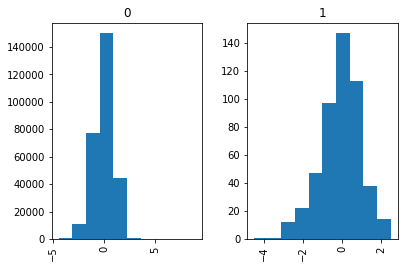

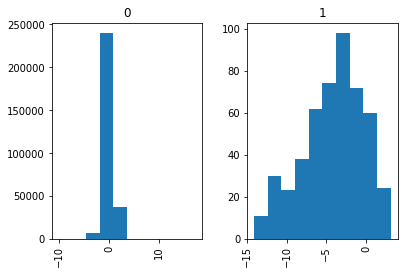

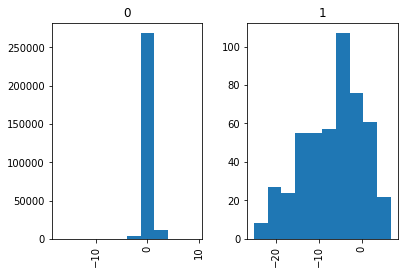

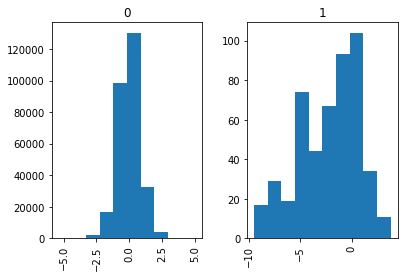

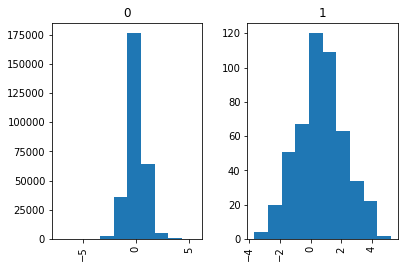

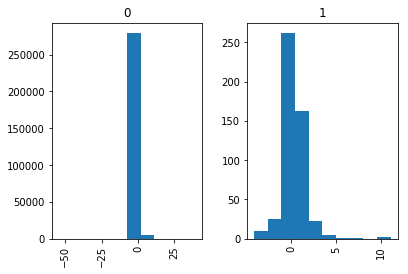

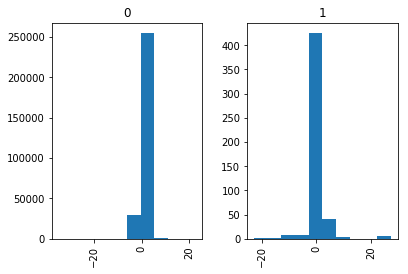

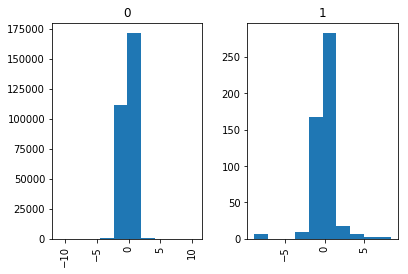

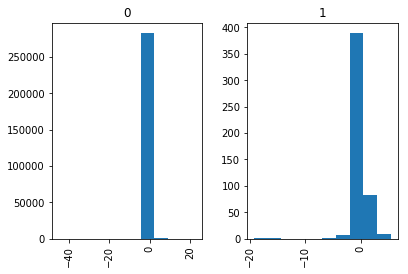

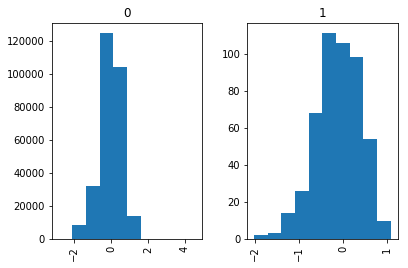

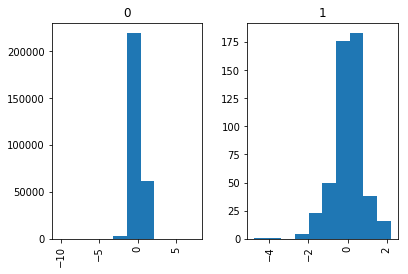

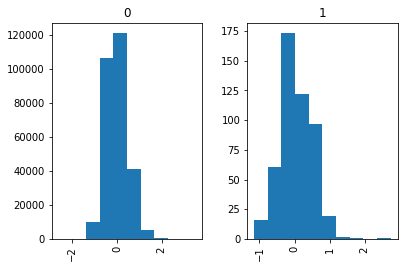

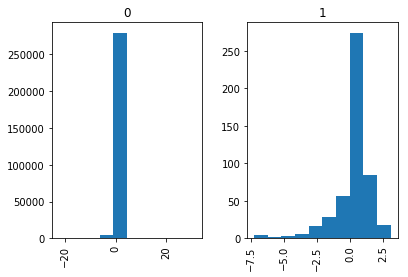

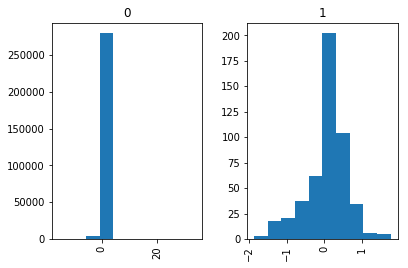

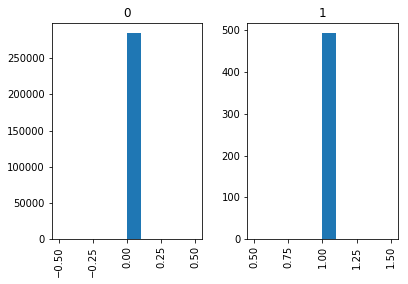

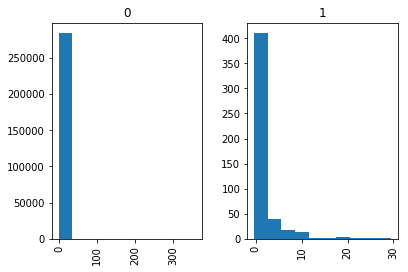

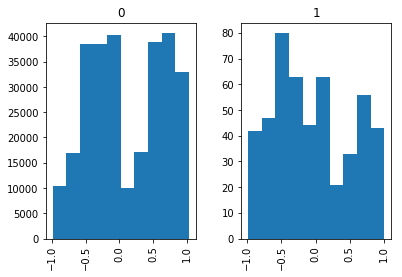

In [6]:
colunas = (list(df))
print(colunas)

#visualizar diferenca entre os histogramas de fraudes e nao fraudes para analise 
for c in colunas:
    df.hist(column = c, by='Class')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

#split entre o modelo para treinamento e o modelo de teste antes do undersampling
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [ ]:
#svm sem nenhuma metrica para balanceamento
svclassifier = SVC(kernel='linear') 
print('iniciando treinamento do modelo linear totalmente desbalanceado')
svclassifier.fit(X_train, y_train) 
print('modelo linear totalmente desbalanceado treinado')

#com o modelo de treino sao feitas previsoes para o modelo de teste
y_pred = svclassifier.predict(X_test) 
print('previsao realizada' )


linear1_SVM_CFmatrix = confusion_matrix(y_test,y_pred)
print(linear1_SVM_CFmatrix)

linear1_SVM_CReport = classification_report(y_test,y_pred)
print(linear1_SVM_CReport) 


iniciando treinamento do modelo linear totalmente desbalanceado


In [ ]:
#svm com todos os dados, porem com class weight balanceados
svclassifier = SVC(kernel='linear', class_weight='balanced', C=1.0) 
print('iniciando treinamento do modelo linear tsem undersampling, mas com class weight balanceado')
svclassifier.fit(X_train, y_train) 
print('modelo linear com todos os dados e balanceamento treinado')

#com o modelo de treino sao feitas previsoes para o modelo de teste
y_pred = svclassifier.predict(X_test) 
print('previsao realizada' )


linear2_SVM_CFmatrix = confusion_matrix(y_test,y_pred)
print(linear2_SVM_CFmatrix)

linear2_SVM_CReport = classification_report(y_test,y_pred)
print(linear2_SVM_CReport) 



In [34]:
# UNDERSAMPLING WITH CLUSTER CENTROIDS
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state = 0)
X_cc, y_cc = cc.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_cc))


Resampled dataset shape Counter({0: 492, 1: 492})


In [35]:
X_traincc, X_testcc, y_traincc, y_testcc = train_test_split(X_cc, y_cc, test_size = 0.20)
print('base balanceada feita com sucesso')

base balanceada feita com sucesso


iniciando treinamento do modelo linear
modelo linear treinado
previsao baseada no modelo linear realizada
[[90  5]
 [ 8 94]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        95
           1       0.95      0.92      0.94       102

   micro avg       0.93      0.93      0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



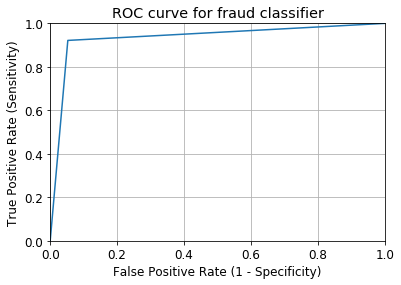

In [36]:
#LINEAR SVM WITH BALANCED DATA
svclassifier = SVC(kernel='linear') 
print('iniciando treinamento do modelo linear')
svclassifier.fit(X_traincc, y_traincc) 
print('modelo linear treinado')

#com o modelo de treino sao feitas previsoes para o modelo de teste
y_pred = svclassifier.predict(X_testcc) 
print('previsao baseada no modelo linear realizada' )

#Confusion Matrix
linear3cc_SVM_CFmatrix = confusion_matrix(y_testcc,y_pred)
print(linear3cc_SVM_CFmatrix)

#classification report
linear3cc_SVM_CReport = classification_report(y_testcc,y_pred)

print(linear3cc_SVM_CReport)

#ROC curve para valiar qualidade do modelo
fpr, tpr, thresholds = metrics.roc_curve(y_testcc, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for fraud classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


iniciando treinamento do modelo linear
modelo gaussiano treinado
previsao baseada no modelo gaussiano realizada
[[71 24]
 [ 7 95]]
              precision    recall  f1-score   support

           0       0.91      0.75      0.82        95
           1       0.80      0.93      0.86       102

   micro avg       0.84      0.84      0.84       197
   macro avg       0.85      0.84      0.84       197
weighted avg       0.85      0.84      0.84       197



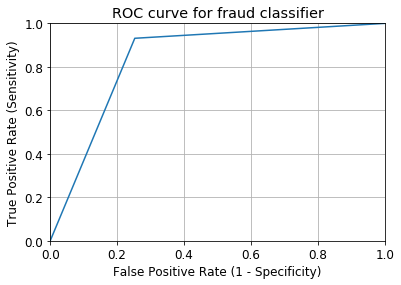

In [51]:
#GAUSSIAN SVM WITH BALANCED DATA
svclassifier = SVC(kernel='rbf', class_weight = {0:0.4, 1:0.6}) 
print('iniciando treinamento do modelo linear')
svclassifier.fit(X_traincc, y_traincc) 
print('modelo gaussiano treinado')

#com o modelo de treino sao feitas previsoes para o modelo de teste
y_pred = svclassifier.predict(X_testcc) 
print('previsao baseada no modelo gaussiano realizada' )

#Confusion Matrix
gaussian1cc_SVM_CFmatrix = confusion_matrix(y_testcc,y_pred)
print(gaussian1cc_SVM_CFmatrix)

#classification report
gaussian1cc_SVM_CReport = classification_report(y_testcc,y_pred)

print(gaussian1cc_SVM_CReport)

#ROC curve para valiar qualidade do modelo
fpr, tpr, thresholds = metrics.roc_curve(y_testcc, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for fraud classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


iniciando treinamento do modelo sigmoide
modelo sigmoide treinado
previsao baseada no modelo sigmoide realizada
[[65 30]
 [24 78]]
              precision    recall  f1-score   support

           0       0.73      0.68      0.71        95
           1       0.72      0.76      0.74       102

   micro avg       0.73      0.73      0.73       197
   macro avg       0.73      0.72      0.72       197
weighted avg       0.73      0.73      0.73       197



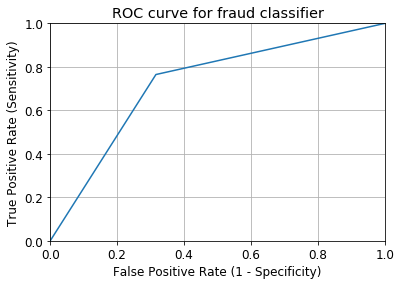

In [38]:
#SIGMOID SVM WITH BALANCED DATA
svclassifier = SVC(kernel='sigmoid') 
print('iniciando treinamento do modelo sigmoide')
svclassifier.fit(X_traincc, y_traincc) 
print('modelo sigmoide treinado')

#com o modelo de treino sao feitas previsoes para o modelo de teste
y_pred = svclassifier.predict(X_testcc) 
print('previsao baseada no modelo sigmoide realizada' )

#Confusion Matrix
sigmoid1cc_SVM_CFmatrix = confusion_matrix(y_testcc,y_pred)
print(sigmoid1cc_SVM_CFmatrix)

#classification report
sigmoid1cc_SVM_CReport = classification_report(y_testcc,y_pred)

print(sigmoid1cc_SVM_CReport)

#ROC curve para valiar qualidade do modelo
fpr, tpr, thresholds = metrics.roc_curve(y_testcc, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for fraud classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

iniciando treinamento do modelo polinomial
modelo polinomial de grau 2 treinado
previsao baseada no modelo polinomial de grau 2 realizada
[[88  7]
 [12 90]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        95
           1       0.93      0.88      0.90       102

   micro avg       0.90      0.90      0.90       197
   macro avg       0.90      0.90      0.90       197
weighted avg       0.90      0.90      0.90       197



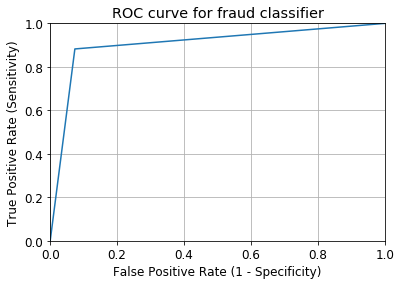

In [39]:
#POLYNOMIAL SVM WITH BALANCED DATA
svclassifier = SVC(kernel='poly', degree = 2.0) 
print('iniciando treinamento do modelo polinomial')
svclassifier.fit(X_traincc, y_traincc) 
print('modelo polinomial de grau 2 treinado')

#com o modelo de treino sao feitas previsoes para o modelo de teste
y_pred = svclassifier.predict(X_testcc) 
print('previsao baseada no modelo polinomial de grau 2 realizada' )

#Confusion Matrix
poly2cc_SVM_CFmatrix = confusion_matrix(y_testcc,y_pred)
print(poly2cc_SVM_CFmatrix)

#classification report
poly2cc_SVM_CReport = classification_report(y_testcc,y_pred)

print(poly2cc_SVM_CReport)

#ROC curve para valiar qualidade do modelo
fpr, tpr, thresholds = metrics.roc_curve(y_testcc, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for fraud classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

iniciando treinamento do modelo polinomial
modelo polinomial de grau 3 treinado
previsao baseada no modelo polinomial de grau 3 realizada
[[92  3]
 [ 9 93]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        95
           1       0.97      0.91      0.94       102

   micro avg       0.94      0.94      0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



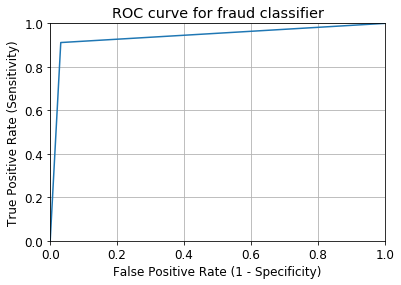

In [40]:
#POLYNOMIAL SVM WITH BALANCED DATA
svclassifier = SVC(kernel='poly', degree = 3.0) 
print('iniciando treinamento do modelo polinomial')
svclassifier.fit(X_traincc, y_traincc) 
print('modelo polinomial de grau 3 treinado')

#com o modelo de treino sao feitas previsoes para o modelo de teste
y_pred = svclassifier.predict(X_testcc) 
print('previsao baseada no modelo polinomial de grau 3 realizada' )

#Confusion Matrix
poly3cc_SVM_CFmatrix = confusion_matrix(y_testcc,y_pred)
print(poly3cc_SVM_CFmatrix)

#classification report
poly3cc_SVM_CReport = classification_report(y_testcc,y_pred)

print(poly3cc_SVM_CReport)

#ROC curve para valiar qualidade do modelo
fpr, tpr, thresholds = metrics.roc_curve(y_testcc, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for fraud classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

iniciando treinamento do modelo polinomial
modelo polinomial de grau 4 treinado
previsao baseada no modelo polinomial de grau 4 realizada
[[89  6]
 [13 89]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        95
           1       0.94      0.87      0.90       102

   micro avg       0.90      0.90      0.90       197
   macro avg       0.90      0.90      0.90       197
weighted avg       0.91      0.90      0.90       197



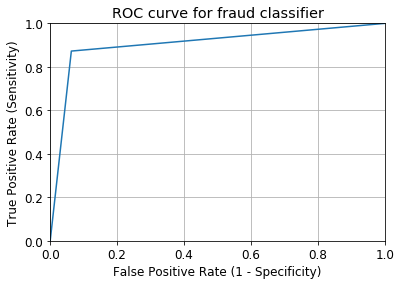

In [41]:
#POLYNOMIAL SVM WITH BALANCED DATA
svclassifier = SVC(kernel='poly', degree = 4.0) 
print('iniciando treinamento do modelo polinomial')
svclassifier.fit(X_traincc, y_traincc) 
print('modelo polinomial de grau 4 treinado')

#com o modelo de treino sao feitas previsoes para o modelo de teste
y_pred = svclassifier.predict(X_testcc) 
print('previsao baseada no modelo polinomial de grau 4 realizada' )

#Confusion Matrix
poly4cc_SVM_CFmatrix = confusion_matrix(y_testcc,y_pred)
print(poly4cc_SVM_CFmatrix)

#classification report
poly4cc_SVM_CReport = classification_report(y_testcc,y_pred)

print(poly4cc_SVM_CReport)

#ROC curve para valiar qualidade do modelo
fpr, tpr, thresholds = metrics.roc_curve(y_testcc, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for fraud classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

iniciando treinamento do modelo polinomial
modelo polinomial de grau 5 treinado
previsao baseada no modelo polinomial de grau 5 realizada
[[92  3]
 [15 87]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        95
           1       0.97      0.85      0.91       102

   micro avg       0.91      0.91      0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197



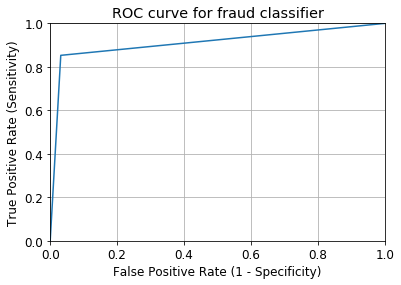

In [42]:
#POLYNOMIAL SVM WITH BALANCED DATA
svclassifier = SVC(kernel='poly', degree = 5.0) 
print('iniciando treinamento do modelo polinomial')
svclassifier.fit(X_traincc, y_traincc) 
print('modelo polinomial de grau 5 treinado')

#com o modelo de treino sao feitas previsoes para o modelo de teste
y_pred = svclassifier.predict(X_testcc) 
print('previsao baseada no modelo polinomial de grau 5 realizada' )

#Confusion Matrix
poly5cc_SVM_CFmatrix = confusion_matrix(y_testcc,y_pred)
print(poly5cc_SVM_CFmatrix)

#classification report
poly5cc_SVM_CReport = classification_report(y_testcc,y_pred)

print(poly5cc_SVM_CReport)

#ROC curve para valiar qualidade do modelo
fpr, tpr, thresholds = metrics.roc_curve(y_testcc, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for fraud classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [59]:
# UNDERSAMPLING WITH RANDOM USER SAMPLER 
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_rus, y_rus = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_rus))

X_trainrus, X_testrus, y_trainrus, y_testrus = train_test_split(X_rus, y_rus, test_size = 0.20)
print('base balanceada feita com sucesso')


Resampled dataset shape Counter({0: 492, 1: 492})
base balanceada feita com sucesso


iniciando treinamento do modelo linear
modelo linear treinado
previsao baseada no modelo linear realizada
[[94  3]
 [ 8 92]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        97
           1       0.97      0.92      0.94       100

   micro avg       0.94      0.94      0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



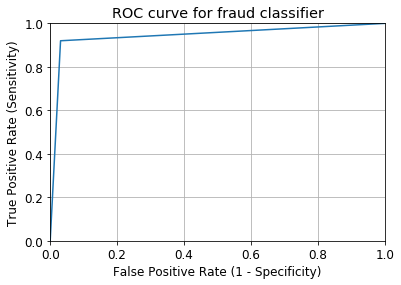

In [61]:
#LINEAR SVM WITH BALANCED DATA
svclassifier = SVC(kernel='linear') 
print('iniciando treinamento do modelo linear')
svclassifier.fit(X_trainrus, y_trainrus) 
print('modelo linear treinado')

#com o modelo de treino sao feitas previsoes para o modelo de teste
y_pred = svclassifier.predict(X_testrus) 
print('previsao baseada no modelo linear realizada' )

#Confusion Matrix
linear3_SVM_CFmatrix = confusion_matrix(y_testrus,y_pred)
print(linear3_SVM_CFmatrix)

#classification report
linear3_SVM_CReport = classification_report(y_testrus,y_pred)

print(linear3_SVM_CReport)

#ROC curve para valiar qualidade do modelo
fpr, tpr, thresholds = metrics.roc_curve(y_testrus, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for fraud classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


iniciando treinamento do modelo gaussiano
modelo gaussiano treinado
previsao baseada no modelo gaussiano realizada
[[90  7]
 [ 7 93]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        97
           1       0.93      0.93      0.93       100

   micro avg       0.93      0.93      0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



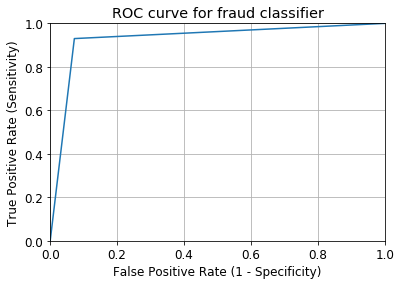

In [62]:
#GAUSSIAN SVM WITH BALANCED DATA
svclassifier = SVC(kernel='rbf') 
print('iniciando treinamento do modelo gaussiano')
svclassifier.fit(X_trainrus, y_trainrus) 
print('modelo gaussiano treinado')

#com o modelo de treino sao feitas previsoes para o modelo de teste
y_pred = svclassifier.predict(X_testrus) 
print('previsao baseada no modelo gaussiano realizada' )

#Confusion Matrix
gaussian1_SVM_CFmatrix = confusion_matrix(y_testrus,y_pred)
print(gaussian1_SVM_CFmatrix)

#classification report
gaussian1_SVM_CReport = classification_report(y_testrus,y_pred)

print(gaussian1_SVM_CReport)

#ROC curve para valiar qualidade do modelo
fpr, tpr, thresholds = metrics.roc_curve(y_testrus, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for fraud classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


iniciando treinamento do modelo sigmoide
modelo sigmoide treinado
previsao baseada no modelo sigmoide realizada
[[79 18]
 [22 78]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80        97
           1       0.81      0.78      0.80       100

   micro avg       0.80      0.80      0.80       197
   macro avg       0.80      0.80      0.80       197
weighted avg       0.80      0.80      0.80       197



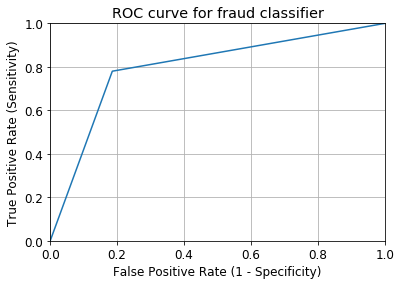

In [63]:
#SIGMOID SVM WITH BALANCED DATA
svclassifier = SVC(kernel='sigmoid') 
print('iniciando treinamento do modelo sigmoide')
svclassifier.fit(X_trainrus, y_trainrus) 
print('modelo sigmoide treinado')

#com o modelo de treino sao feitas previsoes para o modelo de teste
y_pred = svclassifier.predict(X_testrus) 
print('previsao baseada no modelo sigmoide realizada' )

#Confusion Matrix
sigmoid1_SVM_CFmatrix = confusion_matrix(y_testrus,y_pred)
print(sigmoid1_SVM_CFmatrix)

#classification report
sigmoid1_SVM_CReport = classification_report(y_testrus,y_pred)

print(sigmoid1_SVM_CReport)

#ROC curve para valiar qualidade do modelo
fpr, tpr, thresholds = metrics.roc_curve(y_testrus, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for fraud classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


iniciando treinamento do modelo polinomial de grau 2
modelo polinomial de grau 2 treinado
previsao baseada no modelo polinomial de grau 2 realizada
[[93  4]
 [ 6 94]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        97
           1       0.96      0.94      0.95       100

   micro avg       0.95      0.95      0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



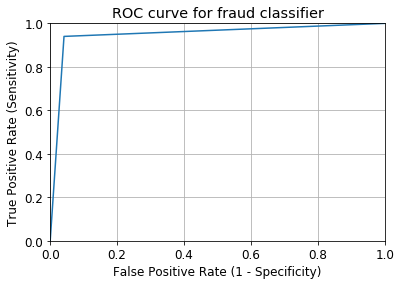

In [64]:
#POLYNOMIAL SVM WITH BALANCED DATA
svclassifier = SVC(kernel='poly', degree = 2.0) 
print('iniciando treinamento do modelo polinomial de grau 2')
svclassifier.fit(X_trainrus, y_trainrus) 
print('modelo polinomial de grau 2 treinado')

#com o modelo de treino sao feitas previsoes para o modelo de teste
y_pred = svclassifier.predict(X_testrus) 
print('previsao baseada no modelo polinomial de grau 2 realizada' )

#Confusion Matrix
poly2_SVM_CFmatrix = confusion_matrix(y_testrus,y_pred)
print(poly2_SVM_CFmatrix)

#classification report
poly2_SVM_CReport = classification_report(y_testrus,y_pred)

print(poly2_SVM_CReport)

#ROC curve para valiar qualidade do modelo
fpr, tpr, thresholds = metrics.roc_curve(y_testrus, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for fraud classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


iniciando treinamento do modelo polinomial de grau 3
modelo polinomial de grau 3 treinado
previsao baseada no modelo polinomial de grau 3 realizada
[[92  5]
 [ 8 92]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        97
           1       0.95      0.92      0.93       100

   micro avg       0.93      0.93      0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



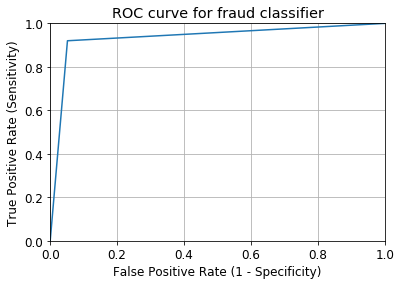

In [65]:
#POLYNOMIAL SVM WITH BALANCED DATA
svclassifier = SVC(kernel='poly', degree = 3.0) 
print('iniciando treinamento do modelo polinomial de grau 3')
svclassifier.fit(X_trainrus, y_trainrus) 
print('modelo polinomial de grau 3 treinado')

#com o modelo de treino sao feitas previsoes para o modelo de teste
y_pred = svclassifier.predict(X_testrus) 
print('previsao baseada no modelo polinomial de grau 3 realizada' )

#Confusion Matrix
poly3_SVM_CFmatrix = confusion_matrix(y_testrus,y_pred)
print(poly3_SVM_CFmatrix)

#classification report
poly3_SVM_CReport = classification_report(y_testrus,y_pred)

print(poly3_SVM_CReport)

#ROC curve para valiar qualidade do modelo
fpr, tpr, thresholds = metrics.roc_curve(y_testrus, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for fraud classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


iniciando treinamento do modelo polinomial de grau 4
modelo polinomial de grau 4 treinado
previsao baseada no modelo polinomial de grau 4 realizada
[[92  5]
 [ 7 93]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        97
           1       0.95      0.93      0.94       100

   micro avg       0.94      0.94      0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



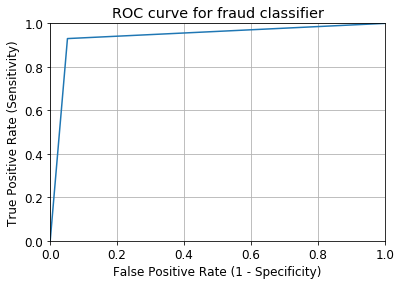

In [66]:
#POLYNOMIAL SVM WITH BALANCED DATA
svclassifier = SVC(kernel='poly', degree = 4.0) 
print('iniciando treinamento do modelo polinomial de grau 4')
svclassifier.fit(X_trainrus, y_trainrus) 
print('modelo polinomial de grau 4 treinado')

#com o modelo de treino sao feitas previsoes para o modelo de teste
y_pred = svclassifier.predict(X_testrus) 
print('previsao baseada no modelo polinomial de grau 4 realizada' )

#Confusion Matrix
poly4_SVM_CFmatrix = confusion_matrix(y_testrus,y_pred)
print(poly4_SVM_CFmatrix)

#classification report
poly4_SVM_CReport = classification_report(y_testrus,y_pred)

print(poly4_SVM_CReport)

#ROC curve para valiar qualidade do modelo
fpr, tpr, thresholds = metrics.roc_curve(y_testrus, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for fraud classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


iniciando treinamento do modelo polinomial de grau 5
modelo polinomial de grau 5 treinado
previsao baseada no modelo polinomial de grau 5 realizada
[[91  6]
 [ 6 94]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        97
           1       0.94      0.94      0.94       100

   micro avg       0.94      0.94      0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



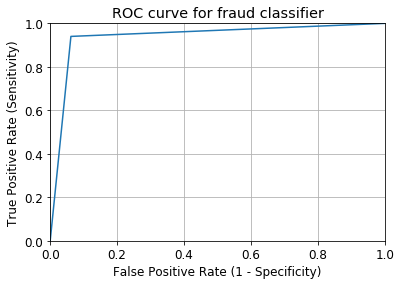

In [67]:
#POLYNOMIAL SVM WITH BALANCED DATA
svclassifier = SVC(kernel='poly', degree = 5.0) 
print('iniciando treinamento do modelo polinomial de grau 5')
svclassifier.fit(X_trainrus, y_trainrus) 
print('modelo polinomial de grau 5 treinado')

#com o modelo de treino sao feitas previsoes para o modelo de teste
y_pred = svclassifier.predict(X_testrus) 
print('previsao baseada no modelo polinomial de grau 5 realizada' )

#Confusion Matrix
poly5_SVM_CFmatrix = confusion_matrix(y_testrus,y_pred)
print(poly5_SVM_CFmatrix)

#classification report
poly5_SVM_CReport = classification_report(y_testrus,y_pred)

print(poly5_SVM_CReport)

#ROC curve para valiar qualidade do modelo
fpr, tpr, thresholds = metrics.roc_curve(y_testrus, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for fraud classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [48]:
#UNDER SAMPLING WITH REPEATED EDITED NEAREST NEIGHBOURS
from imblearn.under_sampling import RepeatedEditedNearestNeighbours

print('comecando renn')

renn = RepeatedEditedNearestNeighbours()
X_renn, y_renn = renn.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_renn))

X_trainrenn, X_testrenn, y_trainrenn, y_testrenn = train_test_split(X_renn, y_renn, test_size = 0.20)
print('base balanceada feita com sucesso')



comecando renn


KeyboardInterrupt: 

iniciando treinamento do modelo linear
modelo linear treinado
previsao baseada no modelo linear realizada
[[56812     2]
 [   18    85]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56814
           1       0.98      0.83      0.89       103

   micro avg       1.00      1.00      1.00     56917
   macro avg       0.99      0.91      0.95     56917
weighted avg       1.00      1.00      1.00     56917



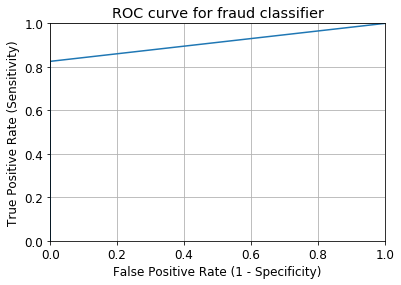

In [45]:
#LINEAR SVM WITH BALANCED DATA
svclassifier = SVC(kernel='linear') 
print('iniciando treinamento do modelo linear')
svclassifier.fit(X_trainrenn, y_trainrenn) 
print('modelo linear treinado')

#com o modelo de treino sao feitas previsoes para o modelo de teste
y_pred = svclassifier.predict(X_testrenn) 
print('previsao baseada no modelo linear realizada' )

#Confusion Matrix
linear3renn_SVM_CFmatrix = confusion_matrix(y_testrenn,y_pred)
print(linear3renn_SVM_CFmatrix)

#classification report
linear3renn_SVM_CReport = classification_report(y_testrenn,y_pred)

print(linear3renn_SVM_CReport)

#ROC curve para valiar qualidade do modelo
fpr, tpr, thresholds = metrics.roc_curve(y_testrenn, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for fraud classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


iniciando treinamento do modelo gaussiano
modelo gaussiano treinado
previsao baseada no modelo gaussiano realizada
[[56814     0]
 [   31    72]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56814
           1       1.00      0.70      0.82       103

   micro avg       1.00      1.00      1.00     56917
   macro avg       1.00      0.85      0.91     56917
weighted avg       1.00      1.00      1.00     56917



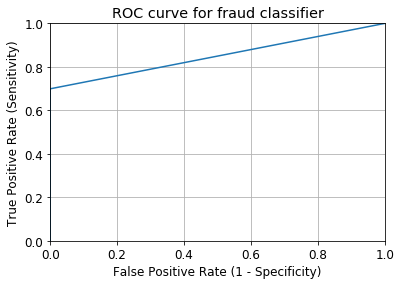

In [47]:
#GAUSSIAN SVM WITH BALANCED DATA
svclassifier = SVC(kernel='rbf') 
print('iniciando treinamento do modelo gaussiano')
svclassifier.fit(X_trainrenn, y_trainrenn) 
print('modelo gaussiano treinado')

#com o modelo de treino sao feitas previsoes para o modelo de teste
y_pred = svclassifier.predict(X_testrenn) 
print('previsao baseada no modelo gaussiano realizada' )

#Confusion Matrix
gaussian1renn_SVM_CFmatrix = confusion_matrix(y_testrenn,y_pred)
print(gaussian1renn_SVM_CFmatrix)

#classification report
gaussian1renn_SVM_CReport = classification_report(y_testrenn,y_pred)

print(gaussian1renn_SVM_CReport)

#ROC curve para valiar qualidade do modelo
fpr, tpr, thresholds = metrics.roc_curve(y_testrenn, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for fraud classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [ ]:
#SIGMOID SVM WITH BALANCED DATA
svclassifier = SVC(kernel='sigmoid') 
print('iniciando treinamento do modelo sigmoide')
svclassifier.fit(X_trainrenn, y_trainrenn) 
print('modelo sigmoide treinado')

#com o modelo de treino sao feitas previsoes para o modelo de teste
y_pred = svclassifier.predict(X_testrenn) 
print('previsao baseada no modelo sigmoide realizada' )

#Confusion Matrix
sigmoid1renn_SVM_CFmatrix = confusion_matrix(y_testrenn,y_pred)
print(sigmoid1renn_SVM_CFmatrix)

#classification report
sigmoid1renn_SVM_CReport = classification_report(y_testrenn,y_pred)

print(sigmoid1renn_SVM_CReport)

#ROC curve para valiar qualidade do modelo
fpr, tpr, thresholds = metrics.roc_curve(y_testrenn, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for fraud classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [ ]:
#POLYNOMIAL SVM WITH BALANCED DATA
svclassifier = SVC(kernel='poly', degree = 2.0) 
print('iniciando treinamento do modelo polinomial de grau 2')
svclassifier.fit(X_trainrenn, y_trainrenn) 
print('modelo polinomial de grau 2 treinado')

#com o modelo de treino sao feitas previsoes para o modelo de teste
y_pred = svclassifier.predict(X_testrenn) 
print('previsao baseada no modelo polinomial de grau 2 realizada' )

#Confusion Matrix
poly2renn_SVM_CFmatrix = confusion_matrix(y_testrenn,y_pred)
print(poly2renn_SVM_CFmatrix)

#classification report
poly2renn_SVM_CReport = classification_report(y_testrenn,y_pred)

print(poly2renn_SVM_CReport)

#ROC curve para valiar qualidade do modelo
fpr, tpr, thresholds = metrics.roc_curve(y_testrenn, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for fraud classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [ ]:
#POLYNOMIAL SVM WITH BALANCED DATA
svclassifier = SVC(kernel='poly', degree = 3.0) 
print('iniciando treinamento do modelo polinomial de grau 3')
svclassifier.fit(X_trainrenn, y_trainrenn) 
print('modelo polinomial de grau 3 treinado')

#com o modelo de treino sao feitas previsoes para o modelo de teste
y_pred = svclassifier.predict(X_testrenn) 
print('previsao baseada no modelo polinomial de grau 3 realizada' )

#Confusion Matrix
poly3renn_SVM_CFmatrix = confusion_matrix(y_testrenn,y_pred)
print(poly3renn_SVM_CFmatrix)

#classification report
poly3renn_SVM_CReport = classification_report(y_testrenn,y_pred)

print(poly3renn_SVM_CReport)

#ROC curve para valiar qualidade do modelo
fpr, tpr, thresholds = metrics.roc_curve(y_testrenn, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for fraud classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [ ]:
#POLYNOMIAL SVM WITH BALANCED DATA
svclassifier = SVC(kernel='poly', degree = 4.0) 
print('iniciando treinamento do modelo polinomial de grau 4')
svclassifier.fit(X_trainrenn, y_trainrenn) 
print('modelo polinomial de grau 4 treinado')

#com o modelo de treino sao feitas previsoes para o modelo de teste
y_pred = svclassifier.predict(X_testrenn) 
print('previsao baseada no modelo polinomial de grau 4 realizada' )

#Confusion Matrix
poly4renn_SVM_CFmatrix = confusion_matrix(y_testrenn,y_pred)
print(poly4renn_SVM_CFmatrix)

#classification report
poly4renn_SVM_CReport = classification_report(y_testrenn,y_pred)

print(poly4renn_SVM_CReport)

#ROC curve para valiar qualidade do modelo
fpr, tpr, thresholds = metrics.roc_curve(y_testrenn, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for fraud classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


iniciando treinamento do modelo polinomial de grau 5
modelo polinomial de grau 5 treinado
previsao baseada no modelo polinomial de grau 5 realizada
[[56805     9]
 [   15    88]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56814
           1       0.91      0.85      0.88       103

   micro avg       1.00      1.00      1.00     56917
   macro avg       0.95      0.93      0.94     56917
weighted avg       1.00      1.00      1.00     56917



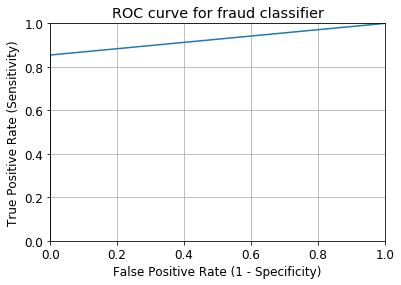

In [49]:
#POLYNOMIAL SVM WITH BALANCED DATA
svclassifier = SVC(kernel='poly', degree = 5.0) 
print('iniciando treinamento do modelo polinomial de grau 5')
svclassifier.fit(X_trainrenn, y_trainrenn) 
print('modelo polinomial de grau 5 treinado')

#com o modelo de treino sao feitas previsoes para o modelo de teste
y_pred = svclassifier.predict(X_testrenn) 
print('previsao baseada no modelo polinomial de grau 5 realizada' )

#Confusion Matrix
poly5renn_SVM_CFmatrix = confusion_matrix(y_testrenn,y_pred)
print(poly5renn_SVM_CFmatrix)

#classification report
poly5renn_SVM_CReport = classification_report(y_testrenn,y_pred)

print(poly5renn_SVM_CReport)

#ROC curve para valiar qualidade do modelo
fpr, tpr, thresholds = metrics.roc_curve(y_testrenn, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for fraud classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [50]:
#RESULTADO DOS MODELOS

print('SUMÁRIO DO RESULTADO DOS MODELOS')


print('MODELOS COM SUB-AMOSTRAGEM CLUSTER CENTROIDS')

print('resultado do modelo Cluster Centroids e SVM linear')

print(linear3cc_SVM_CFmatrix)
print(linear3cc_SVM_CReport)

print('resultado do modelo Cluster Centroids e SVM gaussiano')

print(gaussian1cc_SVM_CFmatrix)
print(gaussian1cc_SVM_CReport)

print('resultado do modelo Cluster Centroids e SVM sigmoide')

print(sigmoid1cc_SVM_CFmatrix)
print(sigmoid1cc_SVM_CReport)

print('resultado do modelo Cluster Centroids e SVM polinomiial de grau 2')

print(poly2cc_SVM_CFmatrix)
print(poly2cc_SVM_CReport)

print('resultado do modelo Cluster Centroids e SVM polinomiial de grau 3')

print(poly3cc_SVM_CFmatrix)
print(poly3cc_SVM_CReport)

print('resultado do modelo Cluster Centroids e SVM polinomiial de grau 4')

print(poly4cc_SVM_CFmatrix)
print(poly4cc_SVM_CReport)

print('resultado do modelo Cluster Centroids e SVM polinomiial de grau 5')

print(poly5cc_SVM_CFmatrix)
print(poly5cc_SVM_CReport)

print('MODELOS COM SUB-AMOSTRAGEM RANDOM UNDER SAMPLER')

print('resultado do modelo Random Under Sampler e SVM linear')

print(linear3_SVM_CFmatrix)
print(linear3_SVM_CReport)

print('resultado do modelo Random Under Sampler e SVM gaussiano')

print(gaussian1_SVM_CFmatrix)
print(gaussian1_SVM_CReport)

print('resultado do modelo Random Under Sampler e SVM sigmoide')

print(sigmoid1_SVM_CFmatrix)
print(sigmoid1_SVM_CReport)

print('resultado do modelo Random Under Sampler e SVM polinomiial de grau 2')

print(poly2_SVM_CFmatrix)
print(poly2_SVM_CReport)

print('resultado do modelo Random Under Sampler e SVM polinomiial de grau 3')

print(poly3_SVM_CFmatrix)
print(poly3_SVM_CReport)

print('resultado do modelo Random Under Sampler e SVM polinomiial de grau 4')

print(poly4_SVM_CFmatrix)
print(poly4_SVM_CReport)

print('resultado do modelo Random Under Sampler e SVM polinomiial de grau 5')

print(poly5_SVM_CFmatrix)
print(poly5_SVM_CReport)

print('MODELOS COM SUB-AMOSTRAGEM REPEATED EDITED NEAREST NEIGHBOURS')



SUMÁRIO DO RESULTADO DOS MODELOS
MODELOS COM SUB-AMOSTRAGEM CLUSTER CENTROIDS
resultado do modelo Cluster Centroids e SVM linear
[[90  5]
 [ 8 94]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        95
           1       0.95      0.92      0.94       102

   micro avg       0.93      0.93      0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197

resultado do modelo Cluster Centroids e SVM gaussiano
[[79 16]
 [ 9 93]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86        95
           1       0.85      0.91      0.88       102

   micro avg       0.87      0.87      0.87       197
   macro avg       0.88      0.87      0.87       197
weighted avg       0.87      0.87      0.87       197

resultado do modelo Cluster Centroids e SVM sigmoide
[[65 30]
 [24 78]]
              precision    recall  f1-score   support